# Naive Bayes

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import norm

%matplotlib inline
plt.style.use("ggplot")

Exercise from: https://brilliant.org/wiki/naive-bayes-classifier/

Model the following dataset for males and females using a Gaussian naive Bayes classifier. Then, for a sample with **height = 6** ft, **weight = 130 lbs**, and **shoe = 8 inches**, predict whether that sample is male or female given the trained model.

<table class="table">
<tbody>
<tr><td>Height (ft)</td><td>Weight (lbs)</td><td>Shoe Size (in)</td><td>Gender</td></tr>
<tr><td>6.00</td><td>180</td><td>12</td><td>male</td></tr>
<tr><td>5.92</td><td>190</td><td>11</td><td>male</td></tr>
<tr><td>5.58</td><td>170</td><td>12</td><td>male</td></tr>
<tr><td>5.92</td><td>165</td><td>10</td><td>male</td></tr>
<tr><td>5.00</td><td>100</td><td>6</td><td>female</td></tr>
<tr><td>5.50</td><td>150</td><td>8</td><td>female</td></tr>
<tr><td>5.42</td><td>130</td><td>7</td><td>female</td></tr>
<tr><td>5.75</td><td>150</td><td>9</td><td>female</td></tr>
</tbody>
</table>

In [3]:
data = pd.DataFrame()
data['height'] = [6, 5.92, 5.58, 5.92, 5, 5.5, 5.42, 5.75]
data['weight'] = [180, 190, 170, 165, 100, 150, 130, 150]
data['shoe_size'] = [12, 11, 12, 10, 6, 8, 7, 9]
data['gender'] = ['m', 'm', 'm', 'm', 'f', 'f', 'f', 'f']

In [4]:
data.head(3)

,height,weight,shoe_size,gender
0,6.00,180,12,m
1,5.92,190,11,m
2,5.58,170,12,m


In [5]:
d_stats = pd.pivot_table(data, values=['height', 'weight', 'shoe_size'], index=['gender'], aggfunc=[np.mean, np.var])
d_stats

mean                         var                      
        height shoe_size  weight    height shoe_size      weight
gender                                                          
f       5.4175      7.50  132.50  0.097225  1.666667  558.333333
m       5.8550     11.25  176.25  0.035033  0.916667  122.916667

In [9]:
def get_pdf_value(argument, feature, gender):
    """Returns value of probability density function for given argument, feature and gender"""
    return norm.pdf(argument, loc=d_stats['mean'][feature][gender], scale=d_stats['var'][feature][gender]**.5)

In [12]:
def plot_comp(feature, argument=None):
    """
    Plots PDFs for a given feature for both genders, optionally marks both PDF values for given argument.
    """
    x = np.linspace(
        min(data[feature].min(), 
            d_stats['mean'][feature]['m'] - 3 * d_stats['var'][feature]['m'] ** .5,
            d_stats['mean'][feature]['f'] - 3 * d_stats['var'][feature]['f'] ** .5),
        max(data[feature].max(),
            d_stats['mean'][feature]['m'] + 3 * d_stats['var'][feature]['m'] ** .5,
            d_stats['mean'][feature]['f'] + 3 * d_stats['var'][feature]['f'] ** .5),
        200)
    plt.plot(x, norm.pdf(x, loc=d_stats['mean'][feature]['m'], scale=d_stats['var'][feature]['m'] ** .5), label='male')
    plt.plot(x, norm.pdf(x, loc=d_stats['mean'][feature]['f'], scale=d_stats['var'][feature]['f'] ** .5), label='female')
    plt.legend(loc=2)
    plt.title(feature)
    if argument is not None:
        plt.scatter(argument, get_pdf_value(argument, feature, 'm'), c='r')
        plt.scatter(argument, get_pdf_value(argument, feature, 'f'), c='b')

**Let's plot and compare probability distribution functions for both classes**

- **height**

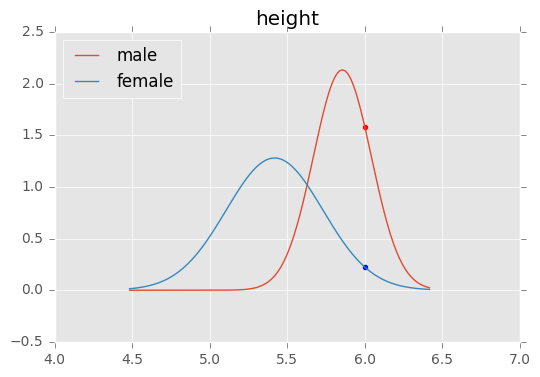

In [14]:
plot_comp('height', 6)

This plot shows that being 6 ft tall is more common for men than women according to our data.

- **weight**

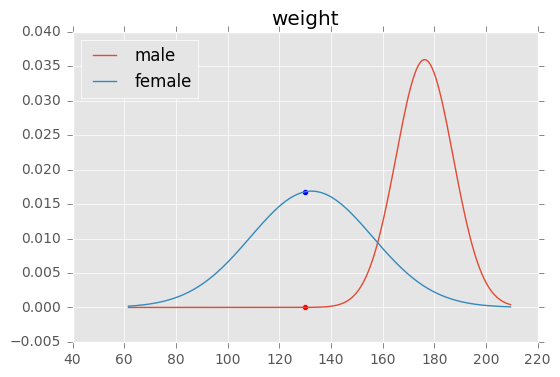

In [77]:
plot_comp('weight', 130)

This plot shows that having weight of 130 lbs is more common for women than men according to our data.

- **shoe size**

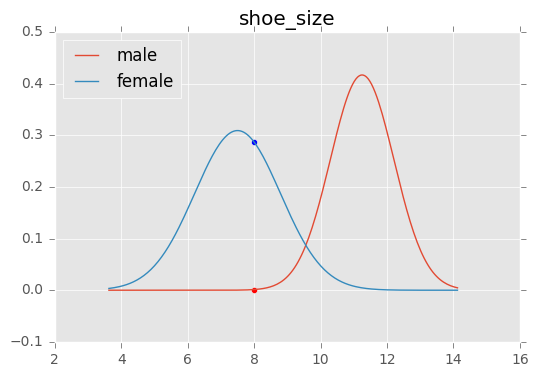

In [15]:
plot_comp('shoe_size', 8)

This plot shows that having shoe size 8 is more common for women than men according to our data.

**Now let's combine all this information and predict whether this sample is male of female according to our model**